## CVU Open and Reproducible Research Computing (Fall 2022)

### Assignment Notebook: Time Series Analysis

Nicole Wagoner
10/3/2022

#### 1. Install the `bmi_nwis` library (if it's not installed already)

In [1]:
#!pip install bmi_nwis

#### 2. Import the libraries required for the assignment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataretrieval.nwis as nwis

output_pkl_file = 'streamflow_data_'

#### 3a. Choose one of the following USGS stream gages to analyze

Uncomment __one__ of the following `site_id` variable declarations. Leave `my_start_date` and `my_end_date` unchanged. All of the sites below have at least 40 years of record. Only the Cache la Poudre has less than 50. 

In [3]:
# site_id = '13185000' # Boise River at Twin Springs
# site_id = '13139510' # Big Wood River at Hailey
site_id = '13246000' # North Fork of the Payette near Banks
# site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
# site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start_date = '1970-10-01'
my_end_date = '2020-09-30'

#### 4. Get the Flow Data

In [4]:
df_flow = nwis.get_record(sites=site_id, service='dv', 
                          start=my_start_date, end=my_end_date)
df_flow

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,
1970-10-01 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1710.0,A
1970-10-02 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1710.0,A
1970-10-03 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1700.0,A
1970-10-04 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1690.0,A
1970-10-05 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1680.0,A
...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,942.0,A
2020-09-27 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,859.0,A
2020-09-28 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,821.0,A


#### 5. Plot the Data

Text(0, 0.5, 'Discharge (ft${}^3$/s)')

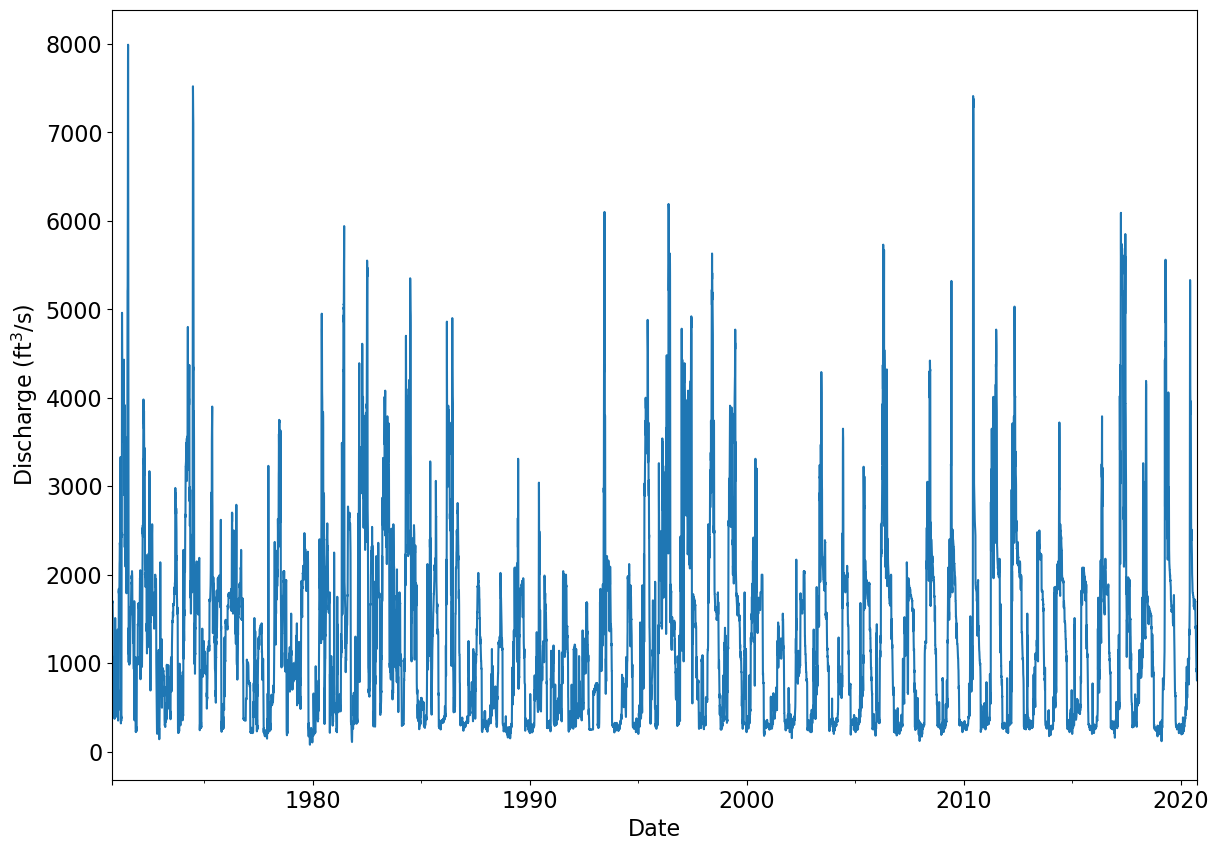

In [5]:
plt.rcParams.update({'font.size': 16})

ax1 = df_flow['00060_Mean'].plot(x='datetime', figsize=(14,10))

ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (ft${}^3$/s)')

#### 6. Wrangle the Data into a `pandas` DataFrame object

Steps: 
* Get the dates and streamflow out of the object returned by our call to `Nwis.nwis()`
* Convert the streamflow in ft${}^3$/s to m${}^3$/s
* Create a water year vector so we can analyze data by water year
* Create a `pandas.DataFrame()` with the data

In [6]:
# Get the dates and convert them to a Pandas datetime object
dates = df_flow.index
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = df_flow['00060_Mean'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = df_flow.index.year.values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? File saved as streamflow_data_13246000.pkl
df.to_pickle(output_pkl_file+site_id+'.pkl')

# Show the dataframe we've created
df

,Dates,WaterYear,Discharge_cfs,Discharge_cms
Dates,,,,
1970-10-01 00:00:00+00:00,1970-10-01 00:00:00+00:00,1971,1710.0,48.423574
1970-10-02 00:00:00+00:00,1970-10-02 00:00:00+00:00,1971,1710.0,48.423574
1970-10-03 00:00:00+00:00,1970-10-03 00:00:00+00:00,1971,1700.0,48.140395
1970-10-04 00:00:00+00:00,1970-10-04 00:00:00+00:00,1971,1690.0,47.857217
1970-10-05 00:00:00+00:00,1970-10-05 00:00:00+00:00,1971,1680.0,47.574038
...,...,...,...,...
2020-09-26 00:00:00+00:00,2020-09-26 00:00:00+00:00,2020,942.0,26.675443
2020-09-27 00:00:00+00:00,2020-09-27 00:00:00+00:00,2020,859.0,24.325059
2020-09-28 00:00:00+00:00,2020-09-28 00:00:00+00:00,2020,821.0,23.248979


#### 7. Compute the Seasonal Cycle and Plot

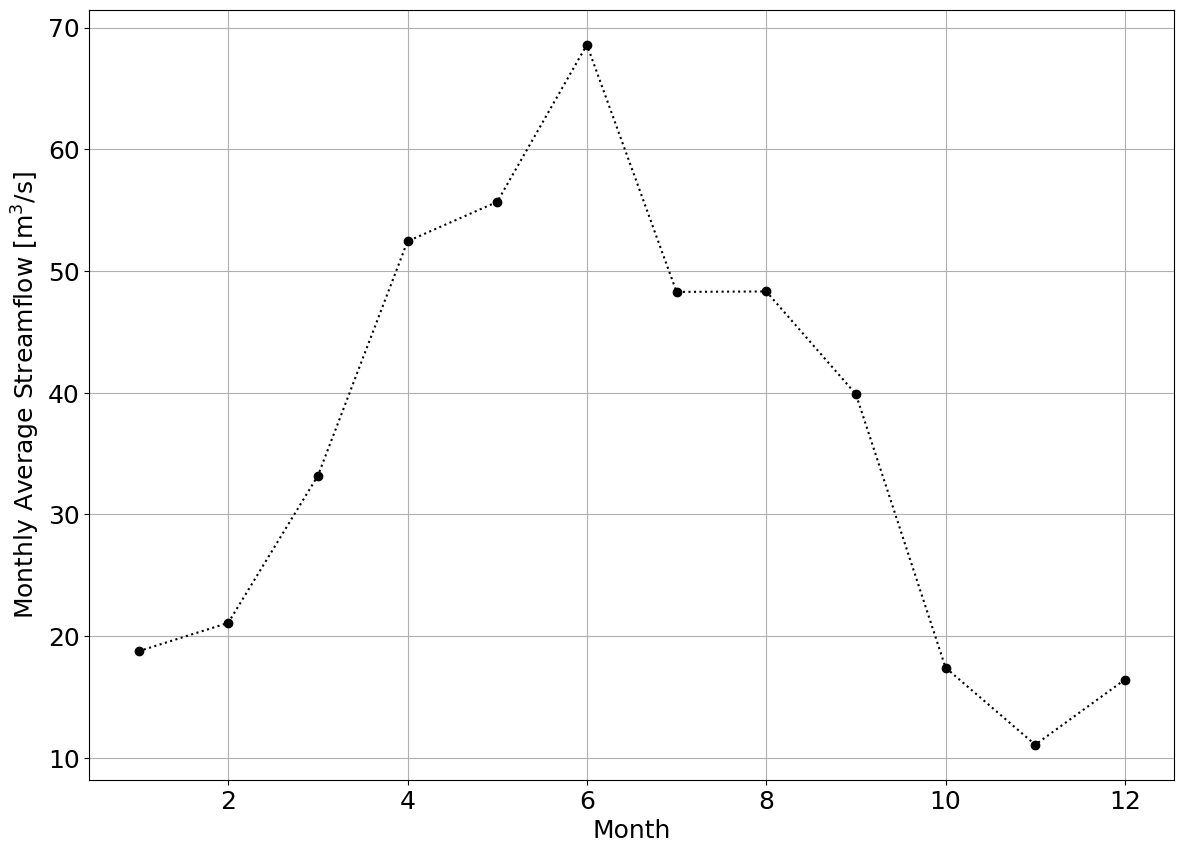

In [7]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

## Instructions
---

1. Download this notebook into the folder for your repository for this module by opening a terminal window, navigating to your repository folder and issuing the command `curl -OL https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb`. Or, [click on this link](https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb) and save the page to your local repository.  
2. Verify that the notebook runs to this point 
3. Go back and change the `site_id` variable to a gage of your choosing by commenting out the current gage selected and uncommenting the gage you would like to investigate. Then in the Jupyter Lab menu go to "Kernel > Restart Kernel and Clear All Outputs" and click "Restart" when prompted
4. Re-run the notebook to this point
5. Now group the streamflow data by `WaterYear` and get the maximum streamflow value for each Water Year. You will need to use the `.groupby()` followed by the `.max()` methods. This should be very similar to the commands used to find the seasonal cycle above, but be sure to make sure to group by Water Year! Store the output of that operation in a variable called `Q_ams`. Print the output of `Q_ams` to see which years were associated with the lowest 5 and highest 5 annual maximum streamflows. __Note:__ See this [DataFrame.groupby()](https://www.geeksforgeeks.org/pandas-groupby/) and [DataFrame.max()](https://www.geeksforgeeks.org/python-pandas-dataframe-max/) documentation for help. 
6. Now sort the annual maximum series in ___descending order___ using the `.sort_values()` method. Use the `.values` to save these values to a numpy array. __Note:__ See this [DataFrame.sort_values()](https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/) and [DataFrame.values](https://www.geeksforgeeks.org/python-pandas-dataframe-values/) documentation for help. 
7. Compute the Weibull plotting position value for each streamflow value. The Weibull series is calculated using the formula:

    $$
    p_i = \frac{r_i}{n+1},
    $$

    where $r_i$ is the rank of the $i$th observation, $n$ is the number of annual maximum observations, and $p_i$ is the exceedance probability. Use the numpy command `np.arange()` method and the `.size` attribute on your annual maximum series array to create an array of ranks associated with each annual maximum value.
8. Create a presentation quality plot showing the annual maximum streamflows on the x-axis and the exceedance probability on the y axis. __Note:__ See this [numpy.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and [numpy.size()](https://numpy.org/doc/stable/reference/generated/numpy.broadcast.size.html) documentation for help. 
9. The $T$-year recurrence interval is associated with an exceedance probability of $p$ which is calculated using:

    $$ 
    p = \frac{1}{T} 
    $$

    Calculate the values of the 20- and 50- year recurrence interval events directly from the Weibull plotting position values by using the numpy `np.interp()` function, which does a very basic interpolation (there are more sophisticated ones, but this is sufficient for now). __Note:__ See this [numpy.interp()](https://www.geeksforgeeks.org/numpy-interp-function-python/) documentation for help.  

In [8]:
#Group streamflow data by water year and find maximum for each water year
Q_ams = df['Discharge_cms'].groupby(df['WaterYear']).max()
Q_ams

WaterYear
1971    226.259858
1972    112.705161
1973     84.387281
1974    212.950455
1975    110.439731
1976     79.006884
1977     48.989932
1978    106.192049
1979     69.945163
1980    140.173504
1981    168.208205
1982    157.164232
1983    115.536949
1984    151.500656
1985     92.882645
1986    138.757610
1987     57.202117
1988     57.202117
1989     93.732182
1990     86.086354
1991     57.768474
1992     47.857217
1993    172.739066
1994     60.033905
1995    138.191253
1996    175.287675
1997    139.323968
1998    159.429662
1999    135.076286
2000     93.732182
2001     44.175892
2002     61.449799
2003    121.483704
2004    103.360261
2005     91.183572
2006    162.261450
2007     60.600262
2008    125.165028
2009    150.651120
2010    209.835488
2011    135.076286
2012    142.438934
2013     70.794699
2014    105.342512
2015     58.901190
2016    107.324764
2017    172.455887
2018    118.651916
2019    157.447411
2020    150.934298
Name: Discharge_cms, dtype: float64

In [9]:
# Sort annual maximum series in descending order
Q_ams_sort = Q_ams.sort_values(ascending = False)
Q_ams_sort

WaterYear
1971    226.259858
1974    212.950455
2010    209.835488
1996    175.287675
1993    172.739066
2017    172.455887
1981    168.208205
2006    162.261450
1998    159.429662
2019    157.447411
1982    157.164232
1984    151.500656
2020    150.934298
2009    150.651120
2012    142.438934
1980    140.173504
1997    139.323968
1986    138.757610
1995    138.191253
2011    135.076286
1999    135.076286
2008    125.165028
2003    121.483704
2018    118.651916
1983    115.536949
1972    112.705161
1975    110.439731
2016    107.324764
1978    106.192049
2014    105.342512
2004    103.360261
2000     93.732182
1989     93.732182
1985     92.882645
2005     91.183572
1990     86.086354
1973     84.387281
1976     79.006884
2013     70.794699
1979     69.945163
2002     61.449799
2007     60.600262
1994     60.033905
2015     58.901190
1991     57.768474
1988     57.202117
1987     57.202117
1977     48.989932
1992     47.857217
2001     44.175892
Name: Discharge_cms, dtype: float64

In [10]:
# Identify lowest 5 annual maximum streamflows water years
Q_ams_sort.tail(5)

WaterYear
1988    57.202117
1987    57.202117
1977    48.989932
1992    47.857217
2001    44.175892
Name: Discharge_cms, dtype: float64

In [11]:
# Identify highest 5 annual maximum streamflows water years
Q_ams_sort.head(5)

WaterYear
1971    226.259858
1974    212.950455
2010    209.835488
1996    175.287675
1993    172.739066
Name: Discharge_cms, dtype: float64

In [12]:
# Save annual maximum series to a numpy array
Q_ams_sort =  Q_ams.sort_values(ascending = False).values
Q_ams_sort

array([226.25985813, 212.95045471, 209.83548795, 175.28767482,
       172.73906566, 172.45588686, 168.20820492, 162.2614502 ,
       159.42966224, 157.44741066, 157.16423187, 151.50065594,
       150.93429835, 150.65111956, 142.43893447, 140.1735041 ,
       139.32396771, 138.75761012, 138.19125252, 135.07628577,
       135.07628577, 125.1650279 , 121.48370355, 118.65191559,
       115.53694883, 112.70516087, 110.4397305 , 107.32476374,
       106.19204856, 105.34251217, 103.3602606 ,  93.73218153,
        93.73218153,  92.88264514,  91.18357236,  86.08635403,
        84.38728125,  79.00688413,  70.79469904,  69.94516265,
        61.44979877,  60.60026238,  60.03390479,  58.9011896 ,
        57.76847442,  57.20211682,  57.20211682,  48.98993174,
        47.85721655,  44.1758922 ])

Compute the Weibull plotting position value for each streamflow value. The Weibull series is calculated using the formula:
$$ p_i = \frac{r_i}{n+1}$$
where $r_i$ is the rank of the $i$th observation, $n$ is the number of annual maximum observations, and $p_i$ is the exceedance probability.

In [13]:
r_i = np.arange(Q_ams_sort.size)+1           # Determine rank of the 𝑖 th observation   
n = 50                                       # Set number of annual maximum observations

# Calculate exceedance probability series
p_ams = (r_i)/(n+1)
p_ams

array([0.01960784, 0.03921569, 0.05882353, 0.07843137, 0.09803922,
       0.11764706, 0.1372549 , 0.15686275, 0.17647059, 0.19607843,
       0.21568627, 0.23529412, 0.25490196, 0.2745098 , 0.29411765,
       0.31372549, 0.33333333, 0.35294118, 0.37254902, 0.39215686,
       0.41176471, 0.43137255, 0.45098039, 0.47058824, 0.49019608,
       0.50980392, 0.52941176, 0.54901961, 0.56862745, 0.58823529,
       0.60784314, 0.62745098, 0.64705882, 0.66666667, 0.68627451,
       0.70588235, 0.7254902 , 0.74509804, 0.76470588, 0.78431373,
       0.80392157, 0.82352941, 0.84313725, 0.8627451 , 0.88235294,
       0.90196078, 0.92156863, 0.94117647, 0.96078431, 0.98039216])

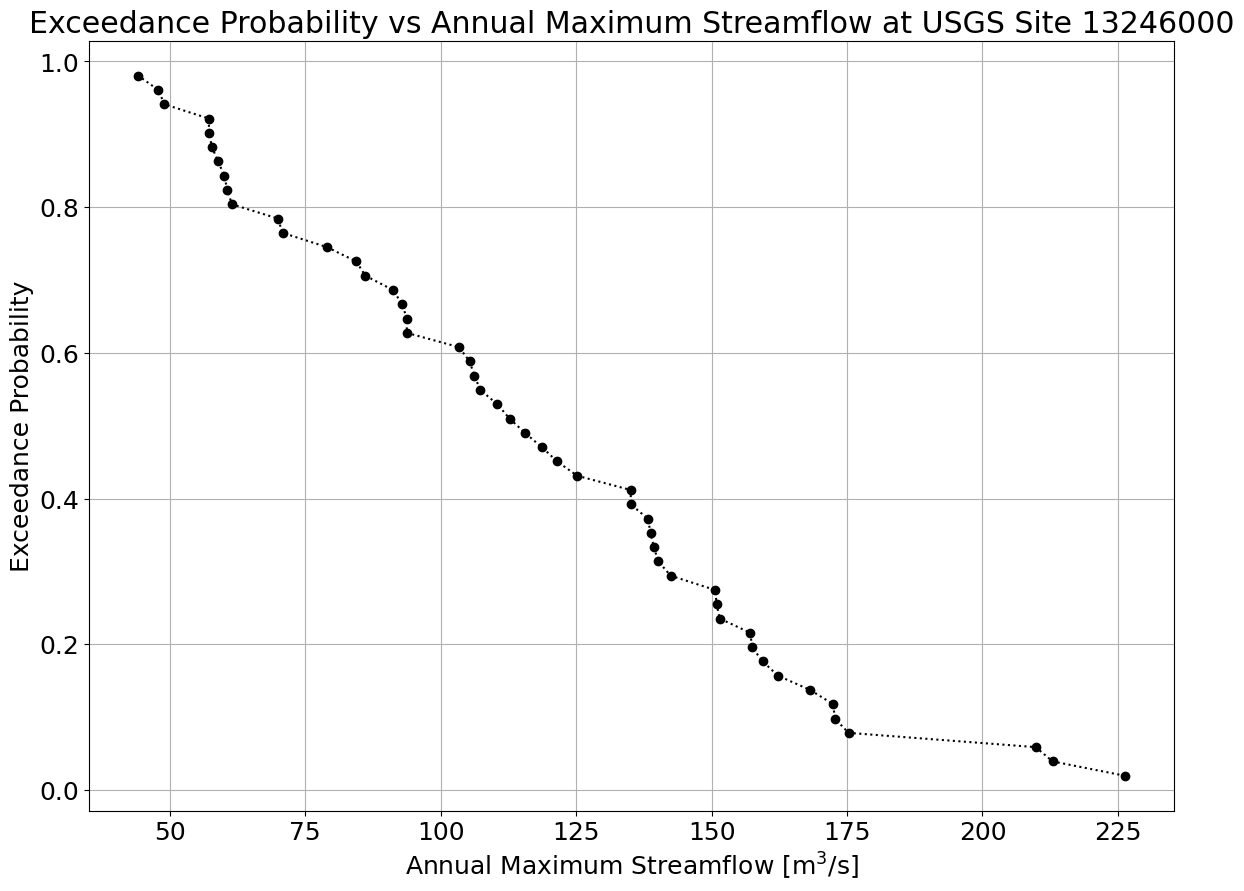

In [14]:
# Plot Exceedance Probabilty vs Annual Maximum Streamflow
plt.figure(figsize = (14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot(Q_ams_sort, p_ams,'ko:')
plt.title('Exceedance Probability vs Annual Maximum Streamflow at USGS Site ' + site_id)
plt.xlabel('Annual Maximum Streamflow [m${}^3$/s]')
plt.ylabel('Exceedance Probability')
plt.grid()
plt.show()

Calculate the values of the 20- and 50- year recurrence interval events directly from the Weibull plotting position values. The $T$-year recurrence interval is associated with an exceedance probability of $p$ which is calculated using:
$$p = \frac{1}{T}$$

In [15]:
T1 = 20             # Set 20-year recurrence interval
T2 = 50             # Set 50-year recurrence interval

p20 = 1/T1          # Calculate 20-year exceedance probability 
print(p20)
p50 = 1/T2          # Calculate 50-year exceedance probability
print(p50)

# Calculate the streamflow magnitude of the 20- and 50- year recurrence interval events through basic interpolation
xp = p_ams          # Set x-coordinates (exceedance probability values) of the data points - axis flipped from graph above
fp = Q_ams_sort     # Set y-coordinates (annual maximum streamflow values) of the data points - axis flipped from graph above

Q20 = np.interp(p20, xp, fp)   # Interpolate streamflow magnitude at 20-year recurrence interval
Q50 = np.interp(p50, xp, fp)   # Interpolate streamflow magnitude at 50-year recurrence interval

0.05
0.02


In [16]:
print('The 20-year flood event has a magnitude of {:.3f} m^3/s'.format(Q20))
print('The 50-year flood event has a magnitude of {:.3f} m^3/s'.format(Q50))

The 20-year flood event has a magnitude of 211.237 m^3/s
The 50-year flood event has a magnitude of 225.994 m^3/s
